## Import libraries and Load the data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#!pip install geopandas
import geopandas as gpd

gdf = gpd.read_file('/content/merged_6month.gpkg')
gdf

,accident_id,street_name_left,number_of_cars_involved,time_series_left,accident_reason,number_of_injured,traffic_id,time_series_right,street_name_right,weather,number_of_cars,average_car_speed,traffic_status,day_name,date,point_geometry_wkt,geometry
0,0,طريق خريص,3,2023-01-01 06:00:00,Road Conditions,0,177,2023-01-01 06:00:00,طريق خريص,Clear,1464,101.28,Light,Sunday,None,POINT (46.8123571 24.7456475),"LINESTRING (46.81213 24.7455, 46.81236 24.74565)"
1,1,خريص,3,2023-01-01 11:00:00,Speeding,0,2329,2023-01-01 11:00:00,خريص,Cloudy,771,37.18,Heavy,Sunday,None,POINT (46.794121 24.7343353),"LINESTRING (46.79363 24.73404, 46.79412 24.73434)"
2,2,خريص,2,2023-01-01 14:00:00,Road Conditions,0,3732,2023-01-01 14:00:00,خريص,Rainy,360,31.73,Heavy,Sunday,None,POINT (46.7826574 24.7277724),"LINESTRING (46.78266 24.72777, 46.7817 24.72718)"
3,3,خريص,2,2023-01-01 16:00:00,Road Conditions,0,4768,2023-01-01 16:00:00,خريص,Clear,955,55.54,Moderate,Sunday,None,POINT (46.8631253 24.7938616),"LINESTRING (46.86313 24.79386, 46.86064 24.79053)"
4,4,طريق خريص,2,2023-01-02 18:00:00,Road Conditions,0,11458,2023-01-02 18:00:00,طريق خريص,Clear,731,32.44,Heavy,Monday,None,POINT (46.7998682 24.7378718),"LINESTRING (46.79987 24.73787, 46.80016 24.73804)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1033,طريق مكة المكرمة,2,2023-06-29 18:00:00,Using Phone,5,941171,2023-06-29 18:00:00,طريق مكة المكرمة,Foggy,947,81.08,Moderate,Thursday,None,POINT (46.7569355 24.7114081),"LINESTRING (46.74937 24.70669, 46.75066 24.707..."
1034,1034,خريص,1,2023-06-30 23:00:00,Road Conditions,0,946019,2023-06-30 23:00:00,خريص,Clear,682,30.71,Heavy,Friday,None,POINT (46.7997335 24.7384061),"LINESTRING (46.79995 24.73854, 46.79973 24.738..."
1035,1035,مكة المكرمة,2,2023-06-30 18:00:00,Using Phone,0,943683,2023-06-30 18:00:00,مكة المكرمة,Clear,852,45.73,Moderate,Friday,None,POINT (46.6839201 24.6765555),"LINESTRING (46.6835 24.6764, 46.68392 24.67656)"
1036,1036,خريص,1,2023-06-30 20:00:00,Road Conditions,0,944434,2023-06-30 20:00:00,خريص,Clear,332,39.67,Heavy,Friday,None,POINT (46.7962479 24.7362403),"LINESTRING (46.79625 24.73624, 46.79449 24.73514)"


## Data Preprocessing

In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   accident_id              1038 non-null   int64         
 1   street_name_left         1038 non-null   object        
 2   number_of_cars_involved  1038 non-null   int64         
 3   time_series_left         1038 non-null   datetime64[ms]
 4   accident_reason          1038 non-null   object        
 5   number_of_injured        1038 non-null   int64         
 6   traffic_id               1038 non-null   int64         
 7   time_series_right        1038 non-null   datetime64[ms]
 8   street_name_right        1038 non-null   object        
 9   weather                  1038 non-null   object        
 10  number_of_cars           1038 non-null   int64         
 11  average_car_speed        1038 non-null   float64       
 12  traffic_status           1

In [4]:
# Count the number of occurrences of each unique accident reason in the 'accident_reason' column
gdf['accident_reason'].value_counts()

,count
accident_reason,
Road Conditions,418
Using Phone,283
Reckless Driving,171
Speeding,130
Weather,36


In [5]:
counts = gdf['accident_reason'].value_counts()
max_count = counts.max()

# Create a balanced dataset
balanced_data = []
for reason in counts.index:
    reason_data = gdf[gdf['accident_reason'] == reason]
    # Oversample to match the max_count
    oversampled = reason_data.sample(max_count, replace=True)
    balanced_data.append(oversampled)

# Concatenate all the balanced data
balanced_data = pd.concat(balanced_data).reset_index(drop=True)

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [6]:
balanced_data['accident_reason'].value_counts()

,count
accident_reason,
Using Phone,418
Speeding,418
Road Conditions,418
Reckless Driving,418
Weather,418


In [7]:
# Dictionary to store label encoders for each column

label_encoders = {}
for column in ['street_name_left', 'accident_reason', 'weather', 'traffic_status', 'day_name']:
    le = LabelEncoder()
    balanced_data[column] = le.fit_transform(balanced_data[column])
    label_encoders[column] = le

In [8]:

X = balanced_data[['number_of_cars_involved', 'number_of_injured','average_car_speed',
         'weather', 'traffic_status', 'day_name']]
y = balanced_data['accident_reason']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Initialize the StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## XGBClassifier


In [12]:
import xgboost as xgb

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print('Confusion Matrix \n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:35:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix 
 [[63  0  3  4  3]
 [ 9 64  7 11  2]
 [ 3  3 64  3  0]
 [ 6 12  0 63  1]
 [ 0  0  0  0 97]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        73
           1       0.81      0.69      0.74        93
           2       0.86      0.88      0.87        73
           3       0.78      0.77      0.77        82
           4       0.94      1.00      0.97        97

    accuracy                           0.84       418
   macro avg       0.83      0.84      0.84       418
weighted avg       0.84      0.84      0.84       418

Accuracy: 0.8397129186602871


## Generate Data for July

In [13]:
import pandas as pd
import numpy as np

# Set basic values
streets = ['طريق خريص', 'خريص', 'مكة المكرمة', 'طريق جدة', 'طريق مكة المكرمة', 'Khurais Road']
weather_conditions = ['Clear', 'Cloudy', 'Rainy', 'Foggy', 'Stormy']
traffic_conditions = ['Light', 'Moderate', 'Heavy']

# Setting up dates for July
dates = pd.date_range(start='2023-07-01', end='2023-07-31')

# Generating data
data = []

# Generate data for each day - only one incident per day
for date in dates:
    random_hour = np.random.randint(0, 24)
    accident_time = date + pd.Timedelta(hours=random_hour)

    data.append({
        'accident_id': len(data) + 1,
        'street_name_left': np.random.choice(streets),
        'number_of_cars_involved': np.random.randint(1, 10),
        'time_series_left': accident_time,
        'number_of_injured': np.random.randint(0, 3),
        'weather': np.random.choice(weather_conditions),
        'number_of_cars': np.random.randint(10, 200),
        'average_car_speed': np.random.uniform(30, 120),
        'traffic_status': np.random.choice(traffic_conditions),
        'day_name': accident_time.strftime('%A'),
        'date': accident_time.date(),
    })

# Convert data to DataFrame
july_data = pd.DataFrame(data)

july_data

,accident_id,street_name_left,number_of_cars_involved,time_series_left,number_of_injured,weather,number_of_cars,average_car_speed,traffic_status,day_name,date
0,1,طريق جدة,9,2023-07-01 17:00:00,0,Stormy,47,74.826282,Heavy,Saturday,2023-07-01
1,2,طريق مكة المكرمة,9,2023-07-02 06:00:00,1,Rainy,139,110.516558,Heavy,Sunday,2023-07-02
2,3,طريق جدة,7,2023-07-03 22:00:00,2,Rainy,62,46.638011,Heavy,Monday,2023-07-03
3,4,طريق جدة,5,2023-07-04 13:00:00,0,Cloudy,68,35.558808,Light,Tuesday,2023-07-04
4,5,خريص,7,2023-07-05 02:00:00,0,Cloudy,127,107.774275,Heavy,Wednesday,2023-07-05
5,6,طريق جدة,1,2023-07-06 21:00:00,1,Cloudy,50,102.901776,Light,Thursday,2023-07-06
6,7,مكة المكرمة,6,2023-07-07 10:00:00,2,Rainy,129,103.840913,Light,Friday,2023-07-07
7,8,Khurais Road,2,2023-07-08 14:00:00,0,Stormy,85,72.369949,Light,Saturday,2023-07-08
8,9,طريق مكة المكرمة,8,2023-07-09 13:00:00,0,Foggy,104,45.815810,Moderate,Sunday,2023-07-09
9,10,مكة المكرمة,9,2023-07-10 20:00:00,1,Rainy,117,36.843334,Heavy,Monday,2023-07-10


## Preprocessing of new data
## Run the model on the new data and store it in a new column (predicted_accident_reason)

In [14]:
# label encoders
for column in ['street_name_left', 'weather', 'traffic_status', 'day_name']:
    july_data[column] = label_encoders[column].transform(july_data[column])

In [15]:
# Create a new DataFrame X_new with selected features from july_data
X_new = july_data[['number_of_cars_involved', 'number_of_injured','average_car_speed',
                  'weather', 'traffic_status', 'day_name']]

In [16]:
# Scale the new data using the previously fitted scaler
X_new_scaled = scaler.transform(X_new)

# Make predictions using the trained model
predictions = model.predict(X_new_scaled)

In [17]:
# Assign the predicted accident reasons to a new column in july_data
july_data['predicted_accident_reason'] = label_encoders['accident_reason'].inverse_transform(predictions)

july_data

,accident_id,street_name_left,number_of_cars_involved,time_series_left,number_of_injured,weather,number_of_cars,average_car_speed,traffic_status,day_name,date,predicted_accident_reason
0,1,2,9,2023-07-01 17:00:00,0,4,47,74.826282,0,2,2023-07-01,Reckless Driving
1,2,4,9,2023-07-02 06:00:00,1,3,139,110.516558,0,3,2023-07-02,Weather
2,3,2,7,2023-07-03 22:00:00,2,3,62,46.638011,0,1,2023-07-03,Road Conditions
3,4,2,5,2023-07-04 13:00:00,0,1,68,35.558808,1,5,2023-07-04,Road Conditions
4,5,1,7,2023-07-05 02:00:00,0,1,127,107.774275,0,6,2023-07-05,Road Conditions
5,6,2,1,2023-07-06 21:00:00,1,1,50,102.901776,1,4,2023-07-06,Road Conditions
6,7,5,6,2023-07-07 10:00:00,2,3,129,103.840913,1,0,2023-07-07,Using Phone
7,8,0,2,2023-07-08 14:00:00,0,4,85,72.369949,1,2,2023-07-08,Road Conditions
8,9,4,8,2023-07-09 13:00:00,0,2,104,45.815810,2,3,2023-07-09,Road Conditions
9,10,5,9,2023-07-10 20:00:00,1,3,117,36.843334,0,1,2023-07-10,Reckless Driving


In [18]:
july_data['predicted_accident_reason'].value_counts()

,count
predicted_accident_reason,
Road Conditions,15
Reckless Driving,7
Using Phone,4
Speeding,3
Weather,2


## Saving July Data and the Model

In [19]:
from shapely.geometry import Point

# Save as CSV
july_data.to_csv('july_data.csv', index=False)

# Save as GeoJSON
gdf.to_file('july_data.geojson', driver='GeoJSON')

# Save as GPKG
gdf.to_file('july_data.gpkg', layer='accidents', driver='GPKG')

print("Data saved as CSV, GeoJSON, and GPKG.")


Data saved as CSV, GeoJSON, and GPKG.


In [20]:
import pickle

# Save the model using pickle
with open('accident_model.pkl', 'wb') as file:
    pickle.dump(model, file)


## Visualizing


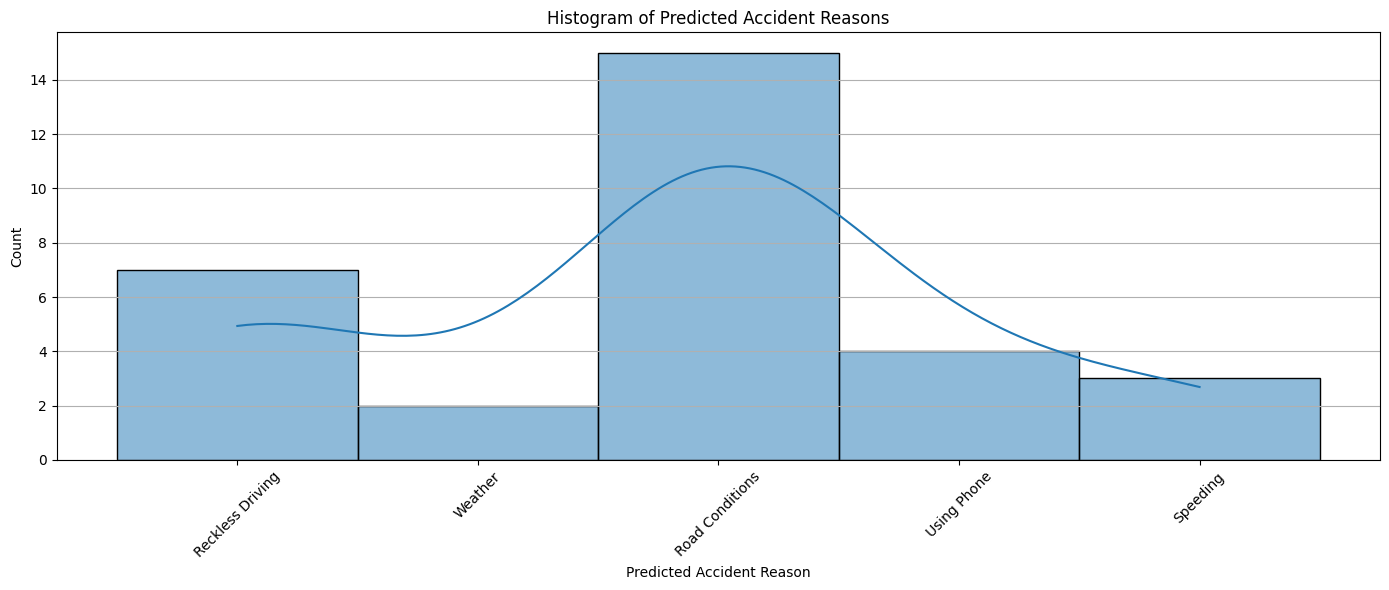

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.histplot(data=july_data, x='predicted_accident_reason', discrete=True, stat="count", kde=True)
plt.title('Histogram of Predicted Accident Reasons')
plt.xlabel('Predicted Accident Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()